In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/content/car data.csv"

df = pd.read_csv("/content/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#**Data Understanding**

In [ ]:
print("\nMenampilkan ringkasan Informasi Dataset:")
df.info()


Menampilkan ringkasan Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print("\nMenampilkan jumlah baris dan kolom:")
print(df.shape)


Menampilkan jumlah baris dan kolom:
(301, 9)


In [ ]:
print("\nMenampilkan tipe data setiap kolom:")
print(df.dtypes)


Menampilkan tipe data setiap kolom:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [ ]:
print("\nMenampilkan statistik deskriptif:")
print(df.describe())


Menampilkan statistik deskriptif:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
print("\nMenampilkan analisis korelasi antar kolom numerik")
print(df.corr(numeric_only=True))


Menampilkan analisis korelasi antar kolom numerik
                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


#**Data Preparation**

##**Melihat Missing Value**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


##**Melihat Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


**Menghapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

##**Pengecekan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,2.341137
Selling_Price,5.351171
Present_Price,4.682274
Kms_Driven,2.675585
Owner,3.678930


**Melakukan Imputasi**

In [ ]:
columns_to_impute = ["Year", "Selling_Price", "Present_Price","Kms_Driven", "Owner"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Melakukan Pengecekan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Owner,0.0


##**Incosistent Value**

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


Menghapus .0 pada kolom Kms_Driven

In [ ]:
df["Kms_Driven"] = df["Kms_Driven"].astype(int)

df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Price_Difference
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,2.27
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,2.10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,1.90
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,7.65
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1.00


##**Construct Data**

In [ ]:
df["Price_Difference"] = df["Present_Price"] - df["Selling_Price"]

print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Price_Difference  
0      Dealer       Manual              2.24  
1      Dealer       Manual              4.79  
2      Dealer       Manual              2.60  
3      Dealer       Manual              1.30  
4      Dealer       Manual              2.27  


##**Data Reduction**

In [ ]:
df = df.drop('Owner', axis=1)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Price_Difference
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,2.27
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,2.10
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,1.90
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,7.65
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1.00


#**Visualisasi Data**

####**Box Plot**

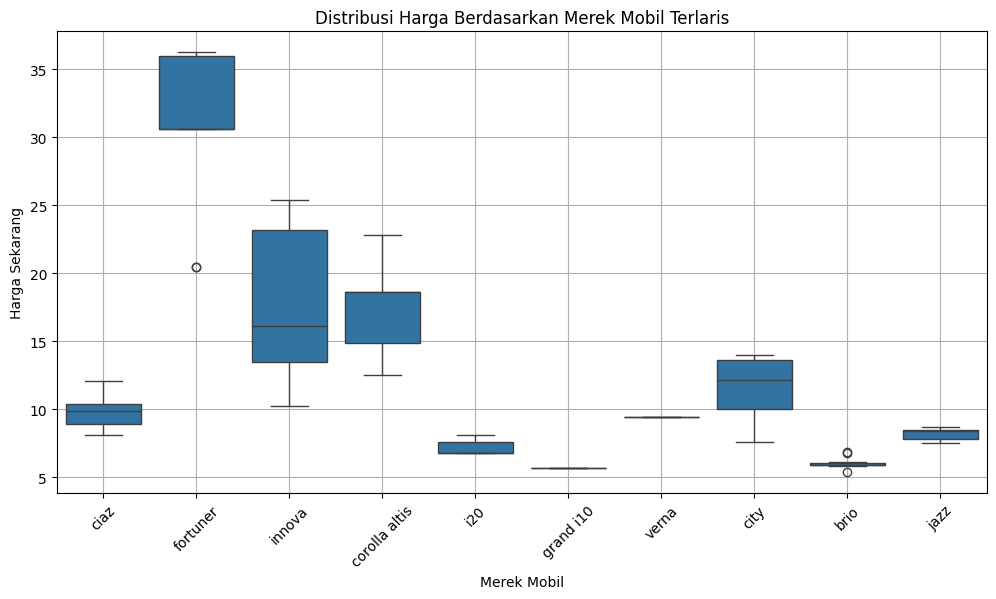

In [4]:
top_brands = df['Car_Name'].value_counts().nlargest(10).index
df_top_brands = df[df['Car_Name'].isin(top_brands)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car_Name', y='Present_Price', data=df_top_brands)
plt.xlabel('Merek Mobil')
plt.ylabel('Harga Sekarang')
plt.title('Distribusi Harga Berdasarkan Merek Mobil Terlaris')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight**

Beberapa merek memiliki harga yang lebih stabil dibandingkan merek lain. Merek dengan popularitas baik cenderung memiliki harga jual kembali yang lebih tinggi.

**Tindakan**
- memilih merek dengan harga stabil untuk menjadi investasi yang lebih baik.
- Menyesuaikan harga berdasarkan popularitas merek dan permintaan di pasar.



####**ScatterPlot**

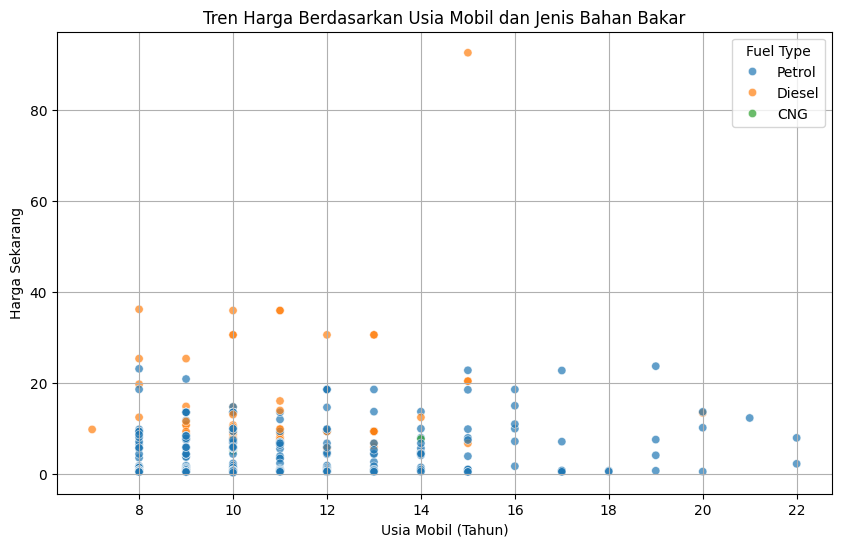

In [6]:
tahun_sekarang = 2025
df['Car_Age'] = tahun_sekarang - df['Year']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Car_Age'], y=df['Present_Price'], hue=df['Fuel_Type'], alpha=0.7)
plt.xlabel('Usia Mobil (Tahun)')
plt.ylabel('Harga Sekarang')
plt.title('Tren Harga Berdasarkan Usia Mobil dan Jenis Bahan Bakar')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()


**Insight**

harga mobil cenderung menurun seiring bertambahnya usia kendaraan. Mobil berbahan bakar diesel memiliki harga yang lebih stabil dalam beberapa tahun pertama dibandingkan dengan mobil berbahan bakar bensin, yang mengalami depresiasi lebih cepat. Hal ini menunjukkan bahwa mobil diesel lebih diminati di pasar mobil bekas atau memiliki daya tahan yang lebih baik dalam mempertahankan nilainya. Selain itu, semakin tua mobil, semakin besar kemungkinan harga jualnya turun drastis.

**Tindakan**

- Menetapkan harga lebih kompetitif untuk mobil bensin yang lebih tua agar lebih cepat terjual.
- Memperkuat dalam penjualan mobil diesel karena lebih diminati oleh pasar

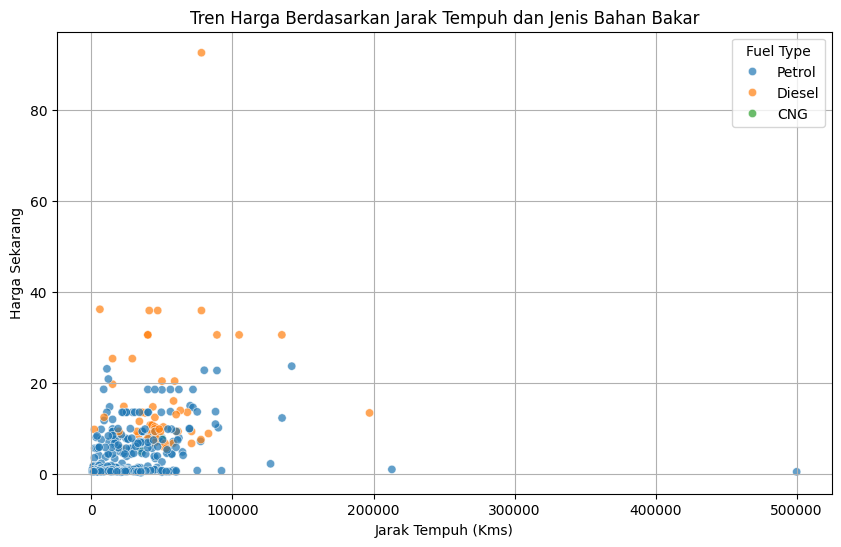

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Kms_Driven'], y=df['Present_Price'], hue=df['Fuel_Type'], alpha=0.7)
plt.xlabel('Jarak Tempuh (Kms)')
plt.ylabel('Harga Sekarang')
plt.title('Tren Harga Berdasarkan Jarak Tempuh dan Jenis Bahan Bakar')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

**Insight**

Semakin tinggi jarak tempuh, harga kendaraan cenderung turun Namun, beberapa mobil dengan jarak tempuh tinggi tetap memiliki harga tinggi, kemungkinan karena faktor merek atau kondisi kendaraan.

**Tindakan**
- Mempertimbangkan jarak tempuh selain usia kendaraan sebelum mengeluarkan harga.
- Memperlihatkan riwayat perawatan dan kondisi mesin pada konsumen untuk mempertahankan harga kendaraan dengan jarak tempuh tinggi.